In [16]:
import pandas as pd
df = pd.read_csv("SRI_Vehiculos_Nuevos_2025.csv", sep=";")


print("Columnas disponibles en la base")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")


Columnas disponibles en la base
1. CATEGORÍA
2. CÓDIGO DE VEHÍCULO
3. TIPO TRANSACCIÓN
4. MARCA
5. MODELO
6. PAIS
7. AÑO MODELO
8. CLASE
9. SUB CLASE
10. TIPO
11. AVALUO
12. FECHA PROCESO (MM/DD/AA)
13. TIPO SERVICIO
14. CILINDRAJE
15. TIPO COMBUSTIBLE
16. FECHA COMPRA (MM/DD/AA)
17. CANTÓN
18. COLOR 1
19. COLOR 2
20. PERSONA NATURAL - JURIDICA


In [47]:
df["FECHA COMPRA"] = pd.to_datetime(df["FECHA COMPRA (MM/DD/AA)"], dayfirst=True)
df_2025 = df[df["FECHA COMPRA"].dt.year == 2025]
print(df["FECHA COMPRA"].head())
df_2025 = df[df["FECHA COMPRA"].dt.year == 2025].copy()
df_2025["mes"] = df_2025["FECHA COMPRA"].dt.month
ventas_mensuales = df_2025.groupby("mes").size().reset_index(name="Ventas")


0   2025-04-10
1   2025-09-01
2   2025-09-11
3   2025-09-10
4   2025-09-30
Name: FECHA COMPRA, dtype: datetime64[ns]


In [48]:
print(ventas_mensuales.head())


   mes  Ventas
0    1   35308
1    2   32087
2    3   33887
3    4   41127
4    5   43061


In [53]:
import pandas as pd
mes_diciembre = pd.DataFrame([[12]], columns=["mes"])
prediccion_diciembre = modelo.predict(mes_diciembre)
print(f"Predicción de ventas en diciembre: {int(prediccion_diciembre.item())} vehículos")

Predicción de ventas en diciembre: 43453 vehículos


In [54]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

x = ventas_mensuales[["mes"]]
y = ventas_mensuales[["Ventas"]]

modelo = LinearRegression()
modelo.fit(X,y)

mes_diciembre = pd.DataFrame([[12]], columns=["mes"])
prediccion_diciembre = modelo.predict(mes_diciembre)
print(f"Predicción de ventas en diciembre: {int(prediccion_diciembre.item())} vehículos")

Predicción de ventas en diciembre: 43453 vehículos


In [40]:
X = ventas_mesuales[["mes"]]  
y = ventas_mesuales["ventas"]

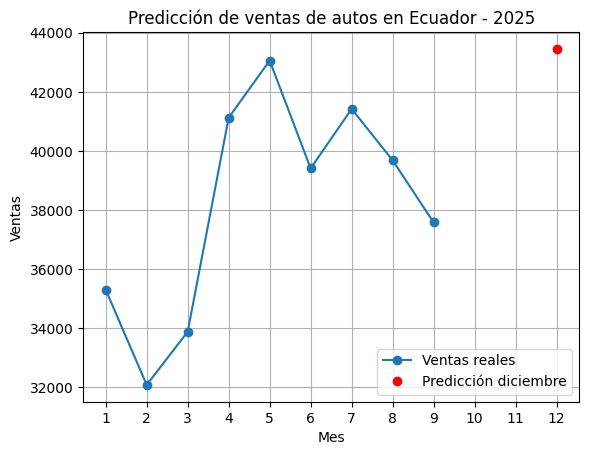

In [55]:
import matplotlib.pyplot as plt

plt.plot(X, y, marker='o', label='Ventas reales')
plt.plot(12, prediccion_diciembre, 'ro', label='Predicción diciembre')
plt.xticks(range(1,13))
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Predicción de ventas de autos en Ecuador - 2025')
plt.legend()
plt.grid(True)
plt.show()